In [10]:
from db_functions import db_create_engine
import pandas as pd
import numpy as np
from configparser import ConfigParser
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sql_queries import legislators_sql
% matplotlib inline

print('Python version', sys.version)
print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.20.3
Numpy version 1.14.0


In [4]:
engine = db_create_engine(config_file='config.ini',
                          conn_name='PostgresConfig')

In [5]:
data = pd.read_sql_query(sql=legislators_sql, con=engine)

In [6]:
data.head()

,party,id,gender,name,religion,twitter_id,location,followers_count,favourites_count,statuses_count,friends_count,twitter_id,tweet_count,tweet_fav_count,retweet_count
0,Republican,R000600,F,Aumua Amata,None,3026622545,"Washington, D.C.",1635.0,161.0,319.0,180.0,3026622545,10.0,36.0,25.0
1,Republican,Y000064,M,Todd Young,None,234128524,Indiana,34170.0,188.0,3657.0,507.0,234128524,72.0,2005.0,750.0
2,Republican,E000295,F,Joni Ernst,None,2856787757,Iowa,32448.0,3.0,1731.0,50.0,2856787757,38.0,2114.0,607.0
3,Republican,T000476,M,Thom Tillis,None,2964174789,"Washington, D.C.",49229.0,854.0,3112.0,4602.0,2964174789,43.0,3235.0,1229.0
4,Republican,Y000063,M,Kevin Yoder,None,252819642,KS 3rd District & DC,27618.0,211.0,7082.0,1654.0,252819642,50.0,6241.0,4914.0


In [82]:
clean_data = data.dropna(how='any', subset=['twitter_id', 'followers_count', 'tweet_count'])
len(clean_data)

492

In [89]:
clean_data.party.value_counts()
r = round(len(clean_data[clean_data['party']=='Republican'])/len(clean_data), 3) * 100
d = round(len(clean_data[clean_data['party']=='Democrat'])/len(clean_data), 3) * 100

print('{}% Republican - {}'.format(r, len(clean_data[clean_data['party']=='Republican'])))
print('{}% Democrat - {}'.format(d, len(clean_data[clean_data['party']=='Democrat'])))

53.5% Republican - 263
46.1% Democrat - 227


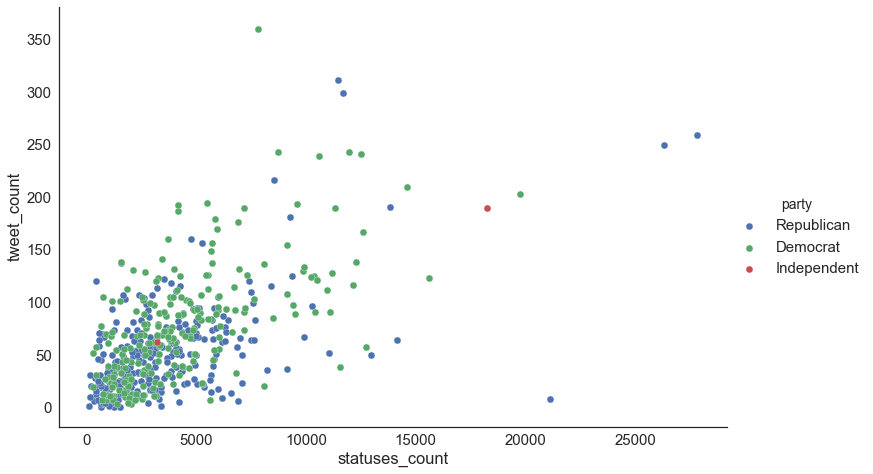

In [81]:
sns.pairplot(x_vars=["statuses_count"], y_vars=["tweet_count"], data=clean_data, 
hue="party", size=7, aspect=1.5);